In [46]:
# importing essential libraries
import pandas as pd
import cv2
import matplotlib.pyplot as plt


In [69]:
#loading the image for face recognition
img_sara = cv2.imread("test_images/sudents12.jpg")
img_sara.shape


(720, 1280, 3)

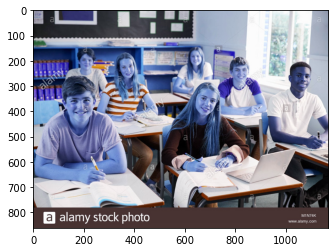

In [19]:
plt.imshow(img_sara)

In [70]:
#Convert into gray scale image
gray_imag_sara1 = cv2.cvtColor(img_sara,cv2.COLOR_BGR2GRAY)
#gray_imag_sara = cv2.equalizeHist(gray_imag_sara1)

In [49]:
gray_imag_sara.shape

(510, 850)

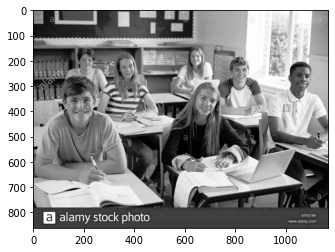

In [22]:
plt.imshow(gray_imag_sara,cmap='gray')

In [71]:
# Detect the rectangle. OpenCV is having haar cascade classifier models object detection. 
# Here we are using frontalface, eye detection xml files to detect the face and two eyes
# Here face_cascade and eye_cascade will act as the classifier to detect the face and two eyes in the image

face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray_imag_sara,1.3,5)
faces

array([[904,  12, 102, 102],
       [274,  18, 107, 107],
       [739, 120, 102, 102],
       [121, 167, 151, 151]], dtype=int32)

4


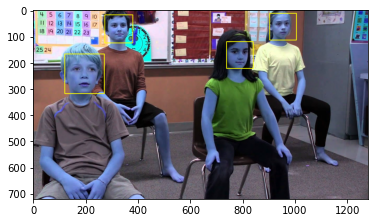

In [74]:
#face portion is highlighted by drawing a rectangle. Red value is selected from the (R,G,B) value (255,0,0)
print(len(faces))
for i in range(len(faces)):
    (x,y,w,h) = faces[i]
    face_img = cv2.rectangle(img_sara,(x,y),(x+w,y+h),(255,255,0),2)
    plt.imshow(face_img)

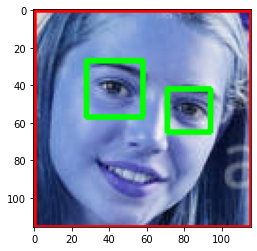

In [9]:
#Detect the two eyes

cv2.destroyAllWindows()
for (x,y,w,h)  in faces:
    face_img = cv2.rectangle(img_sara,(x,y),(x+h,y+h),(255,0,0),2)
    roi_gray = gray_imag_sara[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for(ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
        
plt.figure()
plt.imshow(roi_color,cmap='gray')
plt.show()

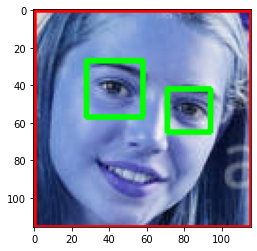

In [10]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')

In [22]:
#crop and return the face if two eyes are visible in the image, otherwise return nothing.Each image is read by its image_path.
#image is converted into gray, since it is of single chanel. 
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for(x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

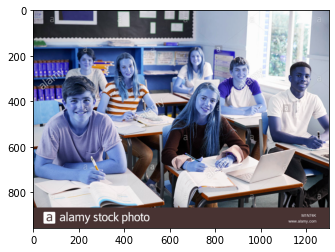

In [23]:
#Test image face is extracted only if the eyes are visible

original_image = cv2.imread('./test_images/students.jpg')
plt.imshow(original_image)

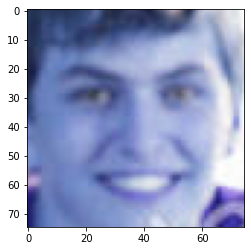

In [20]:
# Cropped image

cropped_image = get_cropped_image_if_2_eyes('./test_images/students.jpg')
plt.imshow(cropped_image)

In [13]:
# data paths are initilized
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [14]:
#Create a img_dirs array which saves the path of all the folders in dataset folder
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [15]:
img_dirs

['./dataset/cropped',
 './dataset/Lionel Messi',
 './dataset/maria sharapova',
 './dataset/Roger Federer',
 './dataset/sareena williams',
 './dataset/virat kohli']

In [16]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [18]:
#cropped_image_dirs - saves the path
# celebrity_file_names_dict - A dictionary which saves the celebrity_name as the key and all the corresponding image name as its value
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    #Extract the celebraty name. Since it is the last string in the path name, -1 is used as the index
    celebrity_name = img_dir.split('/')[-1]
    print(img_dir)
    celebrity_file_names_dict[celebrity_name] = []
    
    # Access each sub folder path inside the dataset folder
    
    for entry in os.scandir(img_dir):
        # get_cropped_image_if_2_eyes function gives the cropped facial image if two eyes are visible
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            print(cropped_folder)
            print(celebrity_name)
            # Make a folder and name it as cropped_folder_celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            # Name the file name ans save the file path
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            # Save the cropped image 
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1
    print(len(cropped_image_dirs))

./dataset/cropped


error: OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-_8k9tw8n\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [147]:
#Reference : https://www.youtube.com/watch?v=m1dQ38qDABw&list=PLeo1K3hjS3uvaRHZLl-jLovIjBP14QTXc&index=2

In [86]:
celebrity_file_names_dict = {}
print(len(cropped_image_dirs))
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

5


{'Lionel Messi': ['./dataset/cropped/Lionel Messi\\Lionel Messi1.png',
  './dataset/cropped/Lionel Messi\\Lionel Messi2.png',
  './dataset/cropped/Lionel Messi\\Lionel Messi3.png',
  './dataset/cropped/Lionel Messi\\Lionel Messi4.png',
  './dataset/cropped/Lionel Messi\\Lionel Messi5.png',
  './dataset/cropped/Lionel Messi\\Lionel Messi6.png',
  './dataset/cropped/Lionel Messi\\Lionel Messi7.png'],
 'maria sharapova': ['./dataset/cropped/maria sharapova\\maria sharapova1.png',
  './dataset/cropped/maria sharapova\\maria sharapova10.png',
  './dataset/cropped/maria sharapova\\maria sharapova11.png',
  './dataset/cropped/maria sharapova\\maria sharapova12.png',
  './dataset/cropped/maria sharapova\\maria sharapova13.png',
  './dataset/cropped/maria sharapova\\maria sharapova14.png',
  './dataset/cropped/maria sharapova\\maria sharapova15.png',
  './dataset/cropped/maria sharapova\\maria sharapova16.png',
  './dataset/cropped/maria sharapova\\maria sharapova17.png',
  './dataset/cropped/m

In [87]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Lionel Messi': 0,
 'maria sharapova': 1,
 'Roger Federer': 2,
 'sareena williams': 3,
 'virat kohli': 4}

In [ ]:
#2. Feature Extraction - Wavelet Transformation

In [88]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

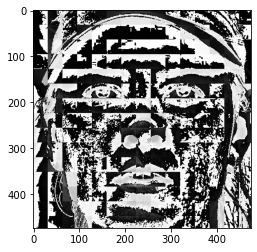

In [89]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [ ]:
#Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now

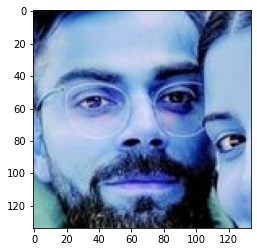

In [90]:
X, y = [], []
#print(len(celebrity_file_names_dict))
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        plt.imshow(img)
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])


In [91]:
len(X[0])

4096

In [92]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(73, 4096)

In [ ]:
# Training a Model

In [93]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
print(pipe.score(X_test, y_test))
print(pipe.predict(X_test))
print(y_test)
#print(y_train)

0.7368421052631579
[4 4 1 1 1 1 4 4 1 1 1 4 4 4 2 4 1 4 4]
[4, 4, 1, 4, 2, 1, 4, 4, 2, 1, 3, 4, 3, 4, 2, 4, 1, 4, 4]


In [96]:
print(X_test[0])
# a=len(X_test)
# for i in range(a):
#     plt.imshow(X_test[i])

[101. 134. 229. ... 235. 254. 250.]


In [97]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           1       0.50      1.00      0.67         4
           2       1.00      0.33      0.50         3
           3       0.00      0.00      0.00         2
           4       0.90      0.90      0.90        10

    accuracy                           0.74        19
   macro avg       0.60      0.56      0.52        19
weighted avg       0.74      0.74      0.69        19



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
#  Perform GridSearchCV to find the best value for the hyper parameter 

In [98]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [99]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [100]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


,model,best_score,best_params
0,svm,0.870909,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.814545,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.832727,{'logisticregression__C': 1}


In [111]:
score = best_estimators['svm'].score(X_test,y_test)
score

0.6842105263157895

In [112]:
score = best_estimators['random_forest'].score(X_test,y_test)
score

0.6842105263157895

In [113]:
score = best_estimators['logistic_regression'].score(X_test, y_test)
score

0.6842105263157895

In [ ]:
# Here SVM is giving the highest score and the best parameters corresponding to the score is given in best_params. Here internally X_train again split into
# train set and validation set. So the performance of trained model is evaluated on validation set. when we test the performance on test set
#

In [104]:
best_clf = best_estimators['svm']

In [105]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[3, 1, 0, 0],
       [2, 1, 0, 0],
       [1, 0, 0, 1],
       [1, 0, 0, 9]], dtype=int64)

Text(69.0, 0.5, 'Truth')

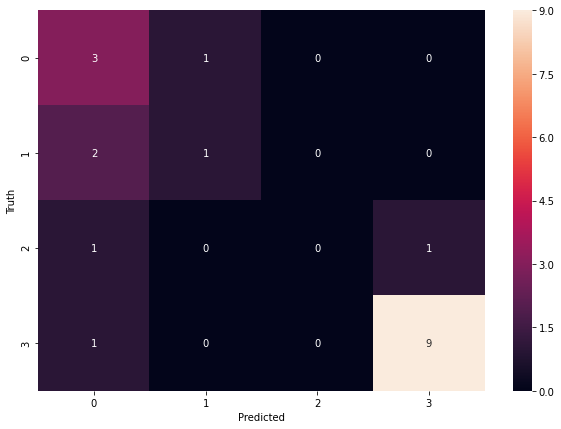

In [106]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [47]:
!pip install joblib

In [107]:
class_dict

{'Lionel Messi': 0,
 'maria sharapova': 1,
 'Roger Federer': 2,
 'sareena williams': 3,
 'virat kohli': 4}

In [108]:
#save the training model
import joblib
joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

In [109]:
# Save class dictionary
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))